In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [47]:
train_data=pd.read_csv("SalaryData_Train(1).csv")
test_data=pd.read_csv("SalaryData_Test(1).csv")

In [48]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [50]:
test_data.drop('education',axis=1)

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [51]:
train_data.drop('education',axis=1)

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [52]:
train_data_category=train_data.select_dtypes(exclude=[np.number]).columns
train_data_category

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [53]:
train_data[train_data_category].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [54]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for i in train_data_category:
    train_data[i]=labelencoder.fit_transform(train_data[i])
    
print('Label Encoder Data:')

Label Encoder Data:


In [55]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [56]:
test_data_category=test_data.select_dtypes(exclude=[np.number]).columns
test_data_category

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [57]:
test_data[test_data_category].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [58]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for i in test_data_category:
    test_data[i]=labelencoder.fit_transform(test_data[i])
    
print('Label Encoder Data:')

Label Encoder Data:


In [59]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


<AxesSubplot:>

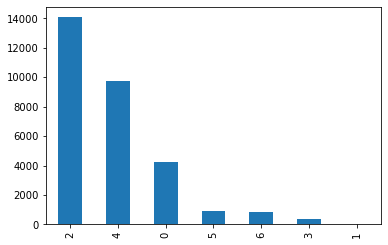

In [60]:
train_data['maritalstatus'].value_counts().plot(kind='bar')

<AxesSubplot:>

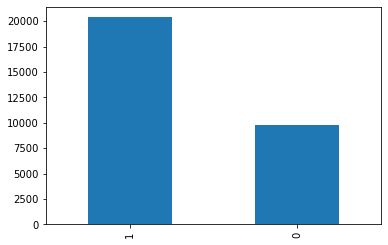

In [35]:
train_data['sex'].value_counts().plot(kind='bar')

In [25]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Salary', ylabel='age'>

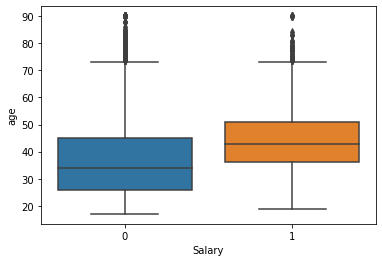

In [32]:
sns.boxplot(train_data.Salary,train_data.age)

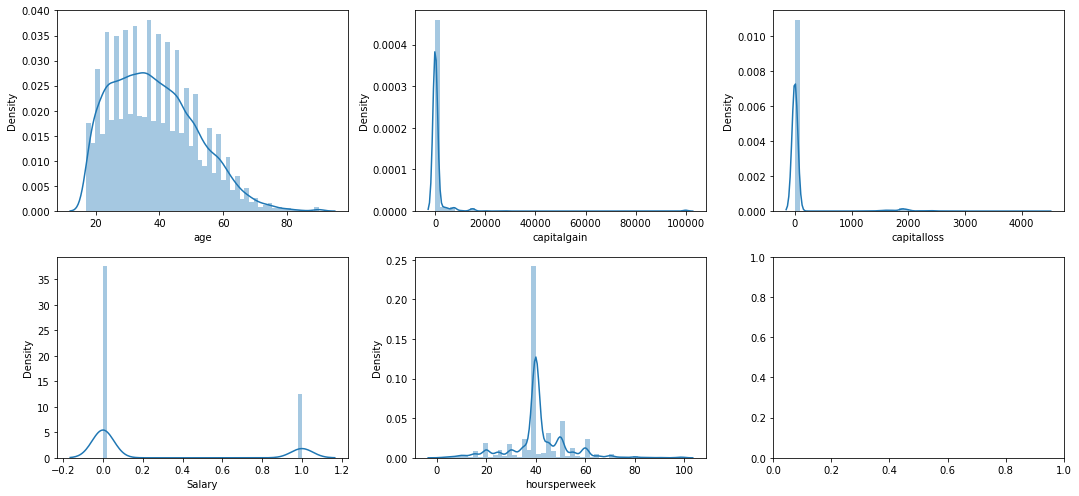

In [66]:
fig, ax = plt.subplots(2, 3, figsize=(15,7))
sns.distplot(train_data.age,ax=ax[0,0])
sns.distplot(train_data.capitalgain,ax=ax[0,1])
sns.distplot(train_data.capitalloss,ax=ax[0,2])
sns.distplot(train_data.Salary,ax=ax[1,0])
sns.distplot(train_data.hoursperweek,ax=ax[1,1])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

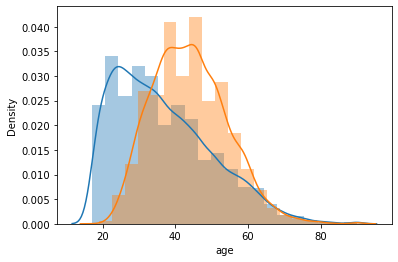

In [34]:
sns.distplot(train_data[train_data.Salary==0].iloc[:,0],norm_hist=True,bins=20)
sns.distplot(train_data[train_data.Salary==1].iloc[:,0],norm_hist=True,bins=20)

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

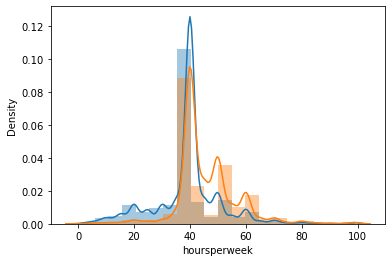

In [33]:
sns.distplot(train_data[train_data.Salary==0].iloc[:,11],norm_hist=True,bins=20)
sns.distplot(train_data[train_data.Salary==1].iloc[:,11],norm_hist=True,bins=20)

In [16]:
x_train=train_data[[col for col in train_data.columns if col!="Salary"]]
y_train=train_data["Salary"]

In [17]:
x_test=test_data[[col for col in test_data.columns if col!="Salary"]]
y_test=test_data["Salary"]

In [18]:
clf = SVC(kernel="rbf",gamma=0.0001)

clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)

confusion_matrix(y_test, y_pred)

Accuracy = 82.24435590969456


array([[11292,    68],
       [ 2606,  1094]], dtype=int64)